# Multi-Class Classification Neural Networks

### Importing the important Libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load the dataset

In [17]:
from tensorflow.keras.datasets.mnist import load_data

(X_train, y_train), (X_test, y_test) = load_data()

### EDA

In [18]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Checking the shape of one image

In [19]:
X_train[0].shape

(28, 28)

In [20]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

Look at the image

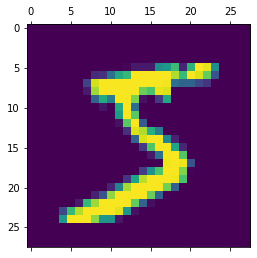

In [21]:
plt.matshow(X_train[0])

Check the label value corresponding to the same

In [22]:
y_train[0]

5

The number is 5
The number is 0
The number is 4
The number is 1
The number is 9


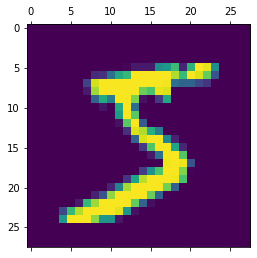

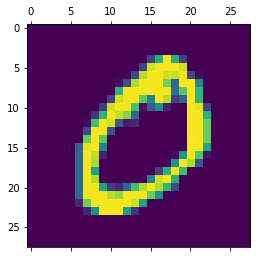

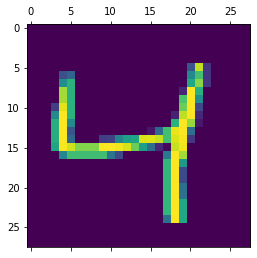

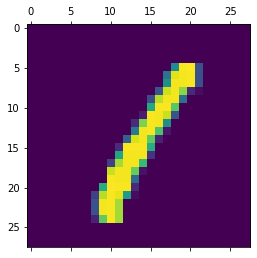

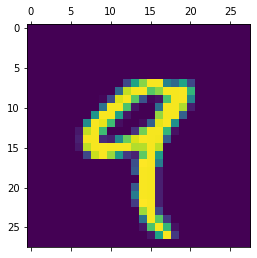

In [23]:
for i in range(0,5):
    plt.matshow(X_train[i])
    print('The number is',y_train[i])

### Data Preprocessing

Normalize the data, reduce the range of 0 to 255 --> 0 to 1 

In [24]:
X_train = X_train/255
X_test = X_test/255

In [25]:
##Check the data range now, it has now come between 0 and 1
X_train[0].shape

(28, 28)

### Flatten the data

There are 60k images and each image is split into 28 x 28 pixels. We will flatten the data converting it from a 2D matrix to  vector

In [26]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)

print('Shape Train', X_train_flattened.shape)
print('Shape Train', X_test_flattened.shape)

Shape Train (60000, 784)
Shape Train (10000, 784)


In [27]:
X_train_flattened

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Single Layer --> Output + Input
Two Layer --> Output + Hidden + Input

### Defining the model

In [28]:
import tensorflow as tf

In [29]:
model = tf.keras.Sequential(
    tf.keras.layers.Dense(10, input_shape = (784,), activation = 'sigmoid')
)

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


### Compile the model

In [31]:
model.compile(optimizer = 'adam',## Adam is an optimization technique
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
)

-**adam** is an optimization algorithm which is faster than Stochastic Gradient Descent. We know that Stochastic Gradient Descent (SGD in short) is just a type of Gradient Descent algorithm.

-**sparse_categorical_crossentropy** is a loss function similar to binary_crossentropy (discussed in Binary Classification Notebook), the only difference is that if the target variable is binary we use binary_crossentropy but if your target values are normal integers more then two, use sparse categorical crossentropy. Why not use categorical_crossentropy? You may ask. Well, this article will help you understand it.

-The metrics used to evaluate the model is accuracy. Accuracy calculates how often the predictions calculated by the model are correct.

In [32]:
model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7181 - accuracy: 0.8117
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3063 - accuracy: 0.9142
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2841 - accuracy: 0.9216
Epoch 4/5
1875/1875 [==============================] - 2s 981us/step - loss: 0.2765 - accuracy: 0.9226
Epoch 5/5
1875/1875 [==============================] - 2s 985us/step - loss: 0.2610 - accuracy: 0.9276


In [33]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 760us/step - loss: 0.2652 - accuracy: 0.9259


[0.265163779258728, 0.9258999824523926]

In [34]:
y_pred = model.predict(X_test_flattened)
y_pred[0]

array([2.0045966e-02, 3.4059283e-07, 7.6423883e-02, 9.6309555e-01,
       2.0911396e-03, 1.3783270e-01, 1.6668881e-06, 9.9980843e-01,
       9.1705948e-02, 6.9305289e-01], dtype=float32)

The above numbers are the probabilities values for different digits. The maximum probability will confirm what is the predicted digit for first image in X_test.

The value at the 0th index in above array of numbers is saying the probability of the digit being 0.

Generalize: The value at the nth index in above array of numbers is saying the probability of the digit being n

np.argmax finds a maximum element from an array and returns the index of i

In [35]:
np.argmax(y_pred[0])

7

### Building a new model with a hidden layer

In [36]:
# Defining the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    tf.keras.layers.Dense(10, activation='sigmoid')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [37]:
# Compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Fit the model
model.fit(X_train_flattened, y_train, batch_size= 128,epochs=5)

Epoch 1/5
469/469 [==============================] - 2s 2ms/step - loss: 0.6374 - accuracy: 0.8223
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.1965 - accuracy: 0.9452
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.1394 - accuracy: 0.9605
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.1098 - accuracy: 0.9682
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0846 - accuracy: 0.9761


In [38]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 919us/step - loss: 0.0947 - accuracy: 0.9700


[0.09472472965717316, 0.9700000286102295]

### Saving the model

In [39]:
##Saving the model
save_dir = '/results/'
model_name = 'keras_minst.h5'
model.save(model_name)
model_path = save_dir + model_name
print('Saved trained model at',model_path)

Saved trained model at /results/keras_minst.h5
